# Preprocessing of WyScout data

****

The data set is taken from "https://figshare.com/collections/Soccer_match_event_dataset/4415000/5"

"Collected by Wyscout (https://wyscout.com/) containing all the spatio-temporal events (passes, shots, fouls, etc.) that occur during all matches of an entire season of seven competitions (La Liga, Serie A, Bundesliga, Premier League, Ligue 1, FIFA World Cup 2018, UEFA Euro Cup 2016). "

"A match event contains information about its position, time, outcome, player and characteristics."

****

These should be cited if the data is used in research or analyses: 

- Pappalardo et al., (2019) A public data set of spatio-temporal match events in soccer competitions, Nature Scientific Data 6:236, https://www.nature.com/articles/s41597-019-0247-7

- Pappalardo et al. (2019) PlayeRank: Data-driven Performance Evaluation and Player Ranking in Soccer via a Machine Learning Approach. ACM Transactions on Intellingent Systems and Technologies (TIST) 10, 5, Article 59 (September 2019), 27 pages. DOI: https://doi.org/10.1145/3343172


****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.json import json_normalize
import json

In [61]:
wyscout_players = pd.read_json('./football-data/players.json')

(3603, 14)

## Wyscout players

In [3]:
print("The shape of wyscout_players is", wyscout_players.shape)

The shape of wyscout_players is (3603, 14)


In [4]:
print("The columns of wyscout_players is", wyscout_players.columns)

The columns of wyscout_players is Index(['passportArea', 'weight', 'firstName', 'middleName', 'lastName',
       'currentTeamId', 'birthDate', 'height', 'role', 'birthArea', 'wyId',
       'foot', 'shortName', 'currentNationalTeamId'],
      dtype='object')


In [5]:
wyscout_players.head(3)

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null


## What values have null values?

In [62]:
print(wyscout_players.isnull().sum())
players = wyscout_players
players[pd.isnull(players['currentTeamId'])].head()


passportArea              0
weight                    0
firstName                 0
middleName                0
lastName                  0
currentTeamId            91
birthDate                 0
height                    0
role                      0
birthArea                 0
wyId                      0
foot                      0
shortName                 0
currentNationalTeamId     0
dtype: int64


(3603, 14)

## Make all null values np.nan

In [7]:
players[players.values == 'null'] = np.nan

In [63]:
players.isnull().sum()


(3603, 14)

*******
## Deal with nested values
passport area, role and birtharea are nested values and can be flattened.

In [64]:
from pandas.io.json import json_normalize 
import json

##We use orient records inorder to not get any indices
json_data = players.to_json(orient='records')

#convert to a json dict datastructure in order to be able to reference values inside it
datastore = json.loads(json_data)


players = json_normalize(datastore)
print(players.columns)
players.head(3)
players.shape

Index(['weight', 'firstName', 'middleName', 'lastName', 'currentTeamId',
       'birthDate', 'height', 'wyId', 'foot', 'shortName',
       'currentNationalTeamId', 'passportArea.name', 'passportArea.id',
       'passportArea.alpha3code', 'passportArea.alpha2code', 'role.code2',
       'role.code3', 'role.name', 'birthArea.name', 'birthArea.id',
       'birthArea.alpha3code', 'birthArea.alpha2code'],
      dtype='object')


(3603, 22)

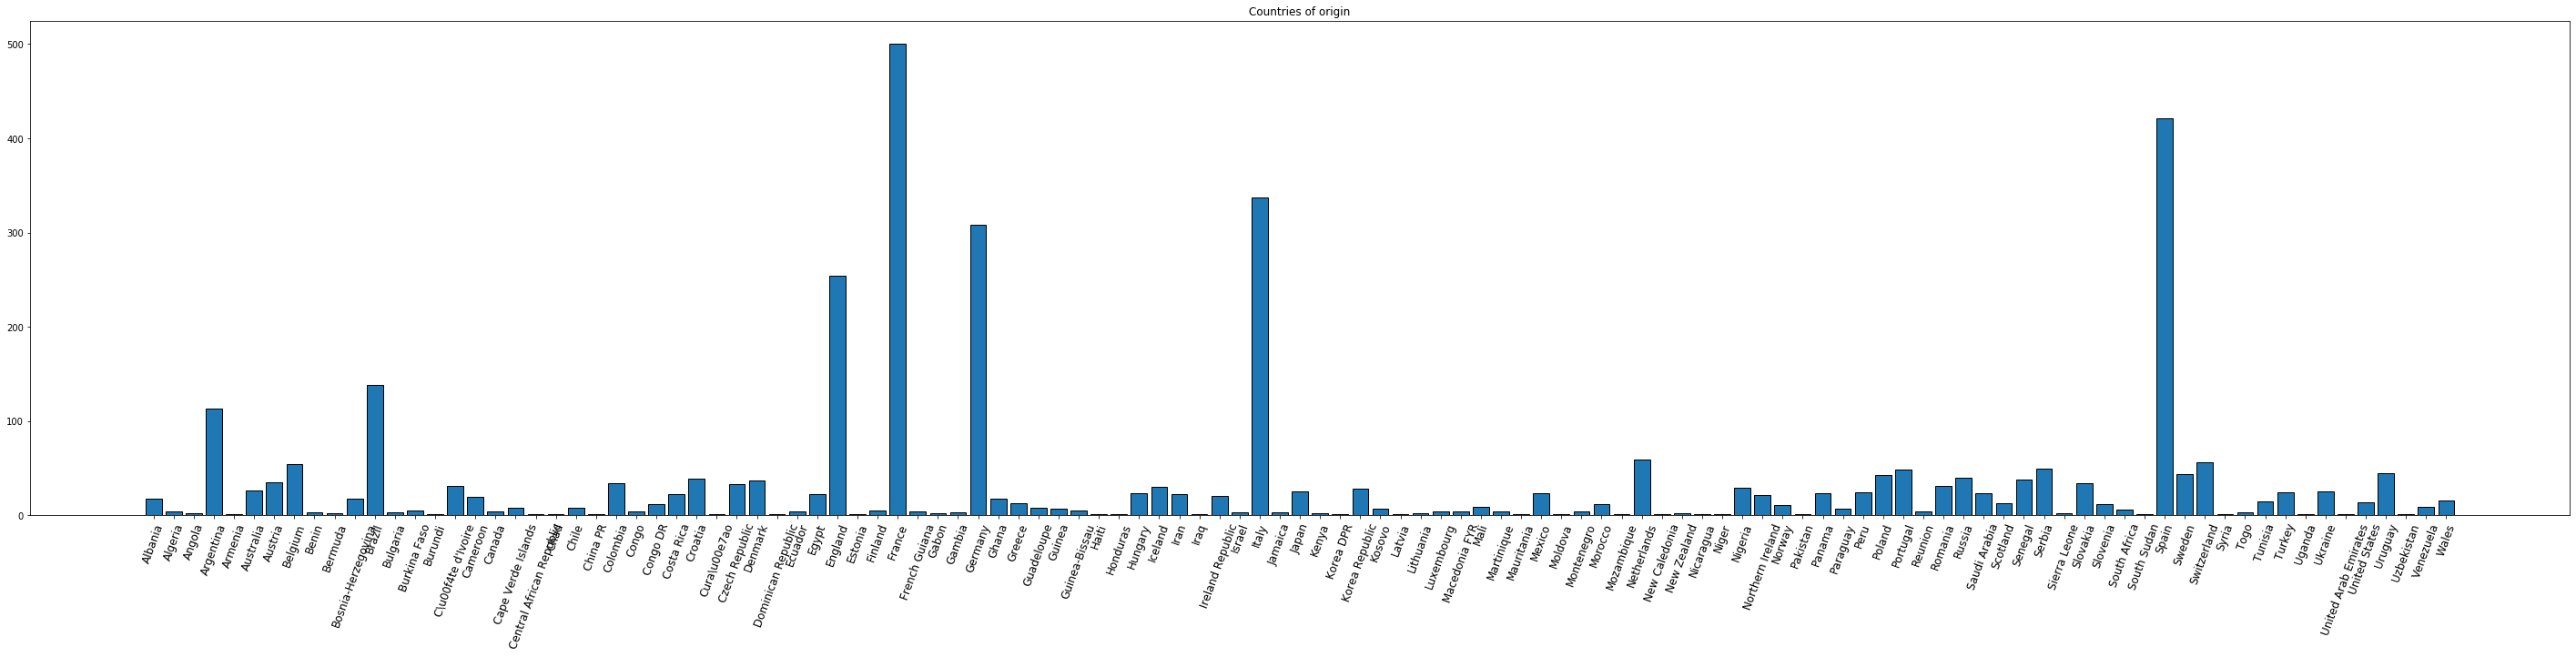

In [10]:
countries, freq = np.unique(players['birthArea.name'], return_counts=True)
plt.figure(figsize=(50,10))
plt.title('Countries of origin')
plt.bar(countries, freq,  align='center', edgecolor='black')
ypos = len(countries)
ypos = np.arange(0,ypos)
plt.xticks(countries,fontsize=12, rotation=70)
plt.show()

France is represented by 500 players, Germany and Italy a little bit above 300, England 250 and Spain above 400 players

## Calculate age and check the age distrubution
We have the datebirth so we need to calcultate the timediffernce

In [11]:
import datetime as dt
today = pd.to_datetime('today')
today.year
players['age'] = today.year  - pd.to_datetime(players['birthDate'].values).year

mean =  round(players['age'].mean(),1)
std = round(players['age'].std(),1)

ages, counts = np.unique(players['age'],return_counts=True)
print(ages)
print(counts)

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 47]
[  2  13  59 140 179 220 237 222 225 244 283 256 249 255 226 188 159 125
 114  79  48  37  13  15   6   6   2   1]


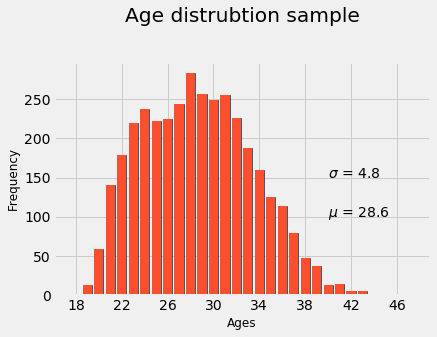

(3603, 22)

In [65]:
plt.style.use('fivethirtyeight')

plt.ylabel('Frequency', fontsize=12)

plt.xlabel('Ages', fontsize=12)
plt.bar(ages,counts, edgecolor='black')
plt.title('Age distrubtion sample', pad=40)
plt.text(40,100 ,'$\mu$ = ' + str(mean))
plt.text(40,150 ,'$\sigma$ = ' + str(std))

plt.bar(ages, counts)

#every 
plt.xticks(np.arange(min(ages), max(ages)+1, 4))


plt.show()

players.shape

**********

## Wyscout-Teams


### As seen the currentTeamId is a key for the team the player is playing for. Also there is nested data as different columns have more than one value.
However let us load the team data to further the analysis of the current data.


In [13]:
wyscout_teams = pd.read_json('./football-data/teams.json')
wyscout_teams.shape
wyscout_teams.columns

#Flatten the nested values
json_data = wyscout_teams.to_json(orient='records')

datastore = json.loads(json_data)

teams = json_normalize(datastore)
print("columns:", teams.columns)
teams.head()

columns: Index(['city', 'name', 'wyId', 'officialName', 'type', 'area.name', 'area.id',
       'area.alpha3code', 'area.alpha2code'],
      dtype='object')


,city,name,wyId,officialName,type,area.name,area.id,area.alpha3code,area.alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES


In [14]:
c, freq = np.unique(teams['area.name'], return_counts=True)
c, freq

(array(['Albania', 'Argentina', 'Australia', 'Austria', 'Belgium',
        'Brazil', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic',
        'Denmark', 'Egypt', 'England', 'France', 'Germany', 'Hungary',
        'Iceland', 'Iran', 'Ireland Republic', 'Italy', 'Japan',
        'Korea Republic', 'Mexico', 'Monaco', 'Morocco', 'Nigeria',
        'Northern Ireland', 'Panama', 'Peru', 'Poland', 'Portugal',
        'Romania', 'Russia', 'Saudi Arabia', 'Senegal', 'Serbia',
        'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'Tunisia', 'Turkey',
        'Ukraine', 'Uruguay', 'Wales'], dtype=object),
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 20, 20, 19,  1,  1,
         1,  1, 21,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1, 21,  1,  1,  1,  1,  1,  1,  2]))

In [15]:
freq[freq > 2 ], c[freq > 2]

(array([20, 20, 19, 21, 21]),
 array(['England', 'France', 'Germany', 'Italy', 'Spain'], dtype=object))

### As seen above the data is predominatly the England, France, German and Italy and all other country have only one team in the dataset.
We will use the big leauges as it is more comparable level of football and there are more datapoints on that

#### Join players that play in the big leauges with the team

In [66]:
players.reset_index()
for i, row in players.iterrows(): 
    team = teams[teams['wyId'] == row['currentTeamId']]['officialName']
    team_country = teams[teams['wyId'] == row['currentTeamId']]['area.name']
    if team.empty is False:
        players.at[i, 'team'] = str(team.values[0])
        players.at[i, 'team_country'] = str(team_country.values[0])
   
    


/home/douglas/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [68]:
players.head()



(3603, 24)

In [69]:
players.isna().sum()

weight                        0
firstName                     0
middleName                    0
lastName                      0
currentTeamId                91
birthDate                     0
height                        0
wyId                          0
foot                          0
shortName                     0
currentNationalTeamId         0
passportArea.name             0
passportArea.id               0
passportArea.alpha3code       0
passportArea.alpha2code       0
role.code2                    0
role.code3                    0
role.name                     0
birthArea.name                0
birthArea.id                  0
birthArea.alpha3code          0
birthArea.alpha2code          0
team                       1164
team_country               1164
dtype: int64

## Save first and then Drop the players with NaN for current club

In [ ]:
players.to_json('./')

In [ ]:

players = players[~players['team'].isna()]

In [20]:
## Drop columnns not needed and save to further processing with the events

## Drop columnns not needed and save to further processing with the events

In [21]:

refined = players[[ 'wyId', 'firstName', 'lastName','currentTeamId', 'team','team_country','role.name', 'age','weight', 'height', 'foot']]
refined.reset_index()
refined.head()

,wyId,firstName,lastName,currentTeamId,team,team_country,role.name,age,weight,height,foot
1,393228,Malang,Sarr,3775.0,O.G.C. Nice C\u00f4te d'Azur,France,Defender,21,73,182,left
2,393230,Over,Mandanda,3772.0,FC Girondins de Bordeaux,France,Goalkeeper,22,72,176,
3,32793,Alfred John Momar,N'Diaye,683.0,M\u00e1laga Club de F\u00fatbol,Spain,Midfielder,30,82,187,right
4,393247,Ibrahima,Konat\u00e9,2975.0,Rasen Ballsport Leipzig,Germany,Defender,21,84,192,right
5,33,Jasper,Cillessen,676.0,FC Barcelona,Spain,Goalkeeper,31,83,185,right


In [22]:
refined.shape

(2439, 11)

In [23]:
np.unique(refined['team'])

array(['1. FC K\\u00f6ln', '1. FSV Mainz 05', 'AC Chievo Verona',
       'AC Milan', 'ACF Fiorentina', 'AFC Bournemouth', 'AS Monaco FC',
       'AS Roma', 'AS Saint-\\u00c9tienne', 'Amiens SC', 'Angers SCO',
       'Arsenal FC', 'Atalanta Bergamasca Calcio', 'Athletic Club Bilbao',
       'BV Borussia 09 Dortmund', 'Benevento Calcio', 'Bologna FC 1909',
       'Borussia VfL M\\u00f6nchengladbach', 'Brighton & Hove Albion FC',
       'Burnley FC', 'CD Legan\\u00e9s', 'Cagliari Calcio', 'Chelsea FC',
       'Club Atl\\u00e9tico de Madrid', 'Crystal Palace FC',
       'Deportivo Alav\\u00e9s', 'Dijon FCO', 'Eintracht Frankfurt',
       'En Avant Guingamp',
       'Esp\\u00e9rance Sportive Troyes Aube Champagne', 'Everton FC',
       'FC Augsburg', 'FC Barcelona', 'FC Bayern M\\u00fcnchen',
       'FC Crotone', 'FC Girondins de Bordeaux',
       'FC Internazionale Milano', 'FC Metz', 'FC Nantes',
       'FC Schalke 04', 'Genoa CFC', 'Getafe Club de F\\u00fatbol',
       'Girona FC', 'Hamb

['England' 'France' 'Germany' 'Italy' 'Monaco' 'Spain' 'Wales'] [425 482 468 520  24 503  17]


Text(0.5, 1.0, 'Distrubution of team countries')

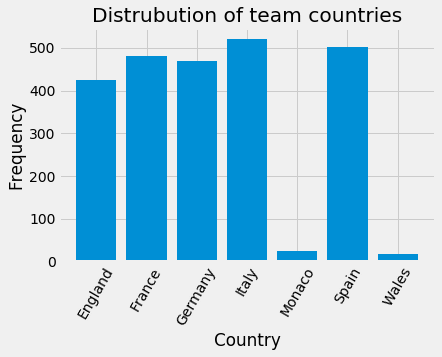

In [24]:
team_country, freq = np.unique(refined['team_country'], return_counts=True)
print(team_country, freq)
plt.figure()
plt.bar(team_country, freq)
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.title('Distrubution of team countries')



### Let us drop the Monaco and Wales teams as they are not playing on the same level

In [25]:
for key, row in refined.iterrows():
    if row['team_country'] == 'Monaco' or row['team_country'] == 'Wales':
        refined.drop([key], inplace=True)
    

/home/douglas/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
np.unique(refined['team_country'])

array(['England', 'France', 'Germany', 'Italy', 'Spain'], dtype=object)

['England' 'France' 'Germany' 'Italy' 'Spain'] [425 482 468 520 503]


Text(0.5, 1.0, 'Distrubution of team countries')

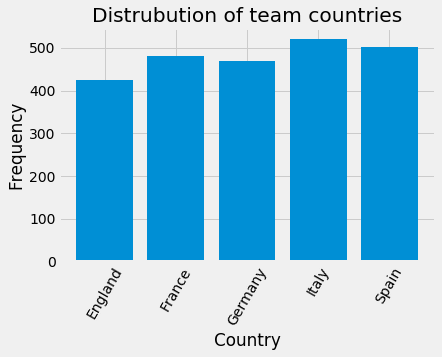

In [27]:
team_country, freq = np.unique(refined['team_country'], return_counts=True)

print(team_country, freq)
plt.figure()
plt.bar(team_country, freq)
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.title('Distrubution of team countries')


In [28]:
refined.shape

(2398, 11)

In [29]:
refined.to_json(path_or_buf='./preprocessed/players.json',orient='records')

In [54]:
np.unique(refined[refined['team_country'] == 'England']['team'])

array(['AFC Bournemouth', 'Arsenal FC', 'Brighton & Hove Albion FC',
       'Burnley FC', 'Chelsea FC', 'Crystal Palace FC', 'Everton FC',
       'Huddersfield Town FC', 'Leicester City FC', 'Liverpool FC',
       'Manchester City FC', 'Manchester United FC',
       'Newcastle United FC', 'Southampton FC', 'Stoke City FC',
       'Tottenham Hotspur FC', 'Watford FC', 'West Bromwich Albion FC',
       'West Ham United FC'], dtype=object)

In [30]:
players = players[~players['team'].isna()]

## Drop columnns not needed and save to further processing with the events

In [31]:

refined = players[[ 'wyId', 'firstName', 'lastName','currentTeamId', 'team','team_country','role.name', 'age','weight', 'height', 'foot']]
refined.reset_index()
refined.head()



,wyId,firstName,lastName,currentTeamId,team,team_country,role.name,age,weight,height,foot
1,393228,Malang,Sarr,3775.0,O.G.C. Nice C\u00f4te d'Azur,France,Defender,21,73,182,left
2,393230,Over,Mandanda,3772.0,FC Girondins de Bordeaux,France,Goalkeeper,22,72,176,
3,32793,Alfred John Momar,N'Diaye,683.0,M\u00e1laga Club de F\u00fatbol,Spain,Midfielder,30,82,187,right
4,393247,Ibrahima,Konat\u00e9,2975.0,Rasen Ballsport Leipzig,Germany,Defender,21,84,192,right
5,33,Jasper,Cillessen,676.0,FC Barcelona,Spain,Goalkeeper,31,83,185,right


In [32]:
refined.shape

(2439, 11)

In [33]:
np.unique(refined['team'])

array(['1. FC K\\u00f6ln', '1. FSV Mainz 05', 'AC Chievo Verona',
       'AC Milan', 'ACF Fiorentina', 'AFC Bournemouth', 'AS Monaco FC',
       'AS Roma', 'AS Saint-\\u00c9tienne', 'Amiens SC', 'Angers SCO',
       'Arsenal FC', 'Atalanta Bergamasca Calcio', 'Athletic Club Bilbao',
       'BV Borussia 09 Dortmund', 'Benevento Calcio', 'Bologna FC 1909',
       'Borussia VfL M\\u00f6nchengladbach', 'Brighton & Hove Albion FC',
       'Burnley FC', 'CD Legan\\u00e9s', 'Cagliari Calcio', 'Chelsea FC',
       'Club Atl\\u00e9tico de Madrid', 'Crystal Palace FC',
       'Deportivo Alav\\u00e9s', 'Dijon FCO', 'Eintracht Frankfurt',
       'En Avant Guingamp',
       'Esp\\u00e9rance Sportive Troyes Aube Champagne', 'Everton FC',
       'FC Augsburg', 'FC Barcelona', 'FC Bayern M\\u00fcnchen',
       'FC Crotone', 'FC Girondins de Bordeaux',
       'FC Internazionale Milano', 'FC Metz', 'FC Nantes',
       'FC Schalke 04', 'Genoa CFC', 'Getafe Club de F\\u00fatbol',
       'Girona FC', 'Hamb

['England' 'France' 'Germany' 'Italy' 'Monaco' 'Spain' 'Wales'] [425 482 468 520  24 503  17]


Text(0.5, 1.0, 'Distrubution of team countries')

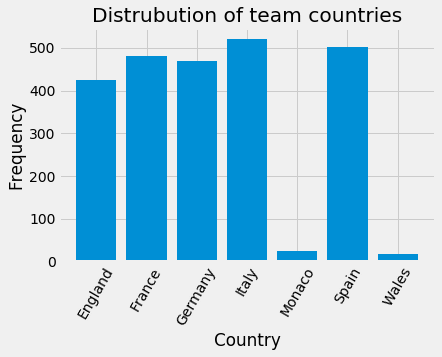

In [34]:
team_country, freq = np.unique(refined['team_country'], return_counts=True)
print(team_country, freq)
plt.figure()
plt.bar(team_country, freq)
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.title('Distrubution of team countries')



### Let us drop the Monaco and Wales teams as they are not playing on the same level

In [35]:
for key, row in refined.iterrows():
    if row['team_country'] == 'Monaco' or row['team_country'] == 'Wales':
        refined.drop([key], inplace=True)
    

In [36]:
np.unique(refined['team_country'])

array(['England', 'France', 'Germany', 'Italy', 'Spain'], dtype=object)

['England' 'France' 'Germany' 'Italy' 'Spain'] [425 482 468 520 503]


Text(0.5, 1.0, 'Distrubution of team countries')

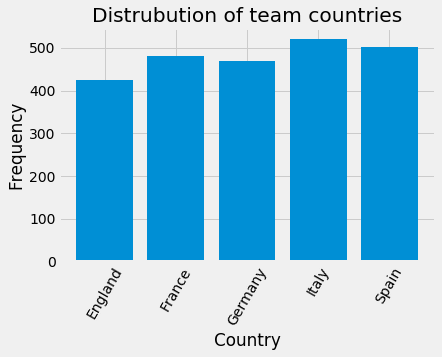

In [37]:
team_country, freq = np.unique(refined['team_country'], return_counts=True)
print(team_country, freq)
plt.figure()
plt.bar(team_country, freq)
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.title('Distrubution of team countries')


In [40]:
refined.shape

(2398, 11)

In [41]:
refined.to_json(path_or_buf='./preprocessed/players.json',orient='records')

In [42]:
p = pd.read_json('./preprocessed/players.json')

In [43]:
p

,wyId,firstName,lastName,currentTeamId,team,team_country,role.name,age,weight,height,foot
0,393228,Malang,Sarr,3775,O.G.C. Nice C\u00f4te d'Azur,France,Defender,21,73,182,left
1,393230,Over,Mandanda,3772,FC Girondins de Bordeaux,France,Goalkeeper,22,72,176,
2,32793,Alfred John Momar,N'Diaye,683,M\u00e1laga Club de F\u00fatbol,Spain,Midfielder,30,82,187,right
3,393247,Ibrahima,Konat\u00e9,2975,Rasen Ballsport Leipzig,Germany,Defender,21,84,192,right
4,33,Jasper,Cillessen,676,FC Barcelona,Spain,Goalkeeper,31,83,185,right
...,...,...,...,...,...,...,...,...,...,...,...
2393,520617,Yann Aurel,Bisseck,2463,1. FC K\u00f6ln,Germany,Defender,20,83,194,right
2394,105332,Darijo,Srna,3173,Cagliari Calcio,Italy,Defender,38,78,178,right
2395,99479,\u0141ukasz,Teodorczyk,3163,Udinese Calcio,Italy,Forward,29,79,188,right
2396,284470,Ante,\u0106ori\u0107,3158,AS Roma,Italy,Midfielder,23,59,176,right
